# Otimizando o comportamento de um consumidor racional

Para mais detalhes, ver [esse tutorial](https://datascience.quantecon.org/scientific/optimization.html).

## Pacotes

In [170]:
## Importando o que for necessário
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [171]:
## Estilos dos gráficos
from matplotlib import style
style.use('ggplot')

## Maximização de Utilidade

O problema (primal) do consumidor é maximizar a sua utilidade (felicidade) respeitando a sua restrição orçamentária.

Vamos focar no caso da função Cobb-Douglas:

$U = A^\alpha B^{1 - \alpha}$,

em que $A, B$ são as quantidades consumidas dos respectivos bens e $ 0 < \alpha < 1$.

### Utilidade e Curvas de Indiferença

Text(0, 0.5, 'U(A=2, B)')

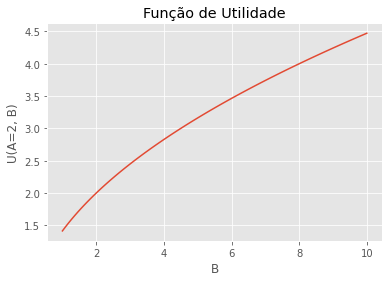

In [172]:
# Definindo a função
def U(A, B, alpha = .5):
    return A**alpha * B**(1-alpha)

# Plottando a utilidade em função de B
## Definindo objetos
fig, ax = plt.subplots()

## Deixando a quantidade do bem A fixa e variando B
A = 2
B = np.linspace(1, 10, 100)

## Plottando
ax.plot(B, U(A, B))
ax.set_title("Função de Utilidade")
ax.set_xlabel("B")
ax.set_ylabel("U(A=2, B)")

Notamos que $U$ é côncava em $A, B$, indicando as preferências convexas (o consumidor se sacia ao longo do tempo, preferindo médias a extremos), e que ela é estritamente crescente, indicando preferências estritamente monotônicas.

Podemos ver a propriedade de preferências convexas usando curvas de indiferença, na qual fixamos o valor de $U = \overline{U}$ e avaliamos o comportamento da utilidade ao variarmos $A$ e $B$.

Isolando B na equação, temos que

$B^{1 - \alpha} = \overline{U} A^{-\alpha} \therefore B = \overline{U}^{\frac{1}{1 - \alpha}} A^{\frac{-\alpha}{1 - \alpha}}$

In [173]:
# Definindo B como função de A para a curva de indiferença (ind)
def B_ind(A, U_bar, alpha=.5):
    return U_bar ** (1 / (1 - alpha)) * A ** (-alpha / (1 - alpha))

# Definindo função para plottar curvas de indiferença
def plot_indifference_curves(ax, alpha=.5):
    # Range de utilidades diferentes (número de curvas de indiferença)
    U_bar = np.arange(1, 5, .5)

    # Plottando intervalos para A e B
    ax.plot(A, B_ind(A, U_bar, alpha))
    ax.legend([r"$\overline{U}$" + " = {}".format(i) for i in U_bar])
    ax.set_xlabel("A")
    ax.set_ylabel(r"$B(A, \overline{U}$)")

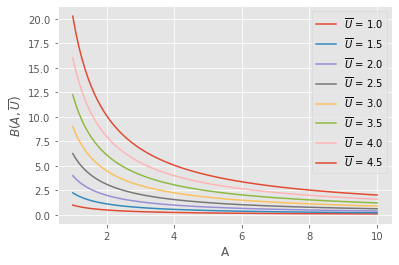

In [174]:
# Vendo curvas de indiferença
## Intervalo para A
A = np.linspace(1, 10, 100).reshape(100, 1)

## Plot
fig, ax = plt.subplots()
plot_indifference_curves(ax)

### Restrição Orçamentária

Infelizmente, o consumidor não pode consumir tudo o que quer, sendo limitado pelo preço dos bens e pela sua renda.

Em outras palavras, o problema de maximização de utilidade é limitado por

$p_A A + p_B B \leq M$,

em que $N$ é a renda do consumidor e $p_i$ é o preço do bem $i$. Assumindo racionalidade, a restrição ocorre com igualdade.

In [175]:
# Definindo a restrição orçamentária (RO)
def restricao(A, B, Pa, Pb, M):
    return Pa*A + Pb*B - M

# Dado A e M, qual é a quantidade máxima de B que o consumidor consegue comprar?
def B_ro(A, M, Pa, Pb):
    return (M - Pa * A) / Pb

# Definindo função para plottar a restrição
def plot_ro(ax, M=10, Pa=2, Pb=1):
    # Definindo espaços de A e B
    A = np.array([0, M])
    B = B_ro(A, M, Pa, Pb)

    # Plottando curva de área sombreada
    ax.plot(A, B)
    ax.fill_between(A, 0, B, alpha=0.2)
    ax.set_xlabel("A")
    ax.set_ylabel("B")

    # Definindo limites
    ax.set_xlim(0, M / Pa)
    ax.set_ylim(0, M / Pb)
    
    return ax

<AxesSubplot:xlabel='A', ylabel='B'>

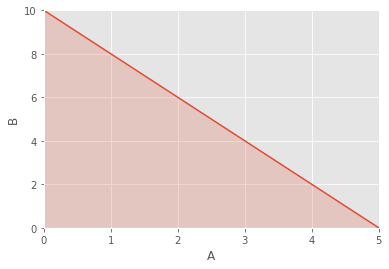

In [176]:
# Visualizando restrição
fig, ax = plt.subplots()
plot_ro(ax)

A área sombreada representa o conjunto de cestas factíveis; como o consumidor é racional, ele escolherá algum ponto na fronteira desse conjunto.

<AxesSubplot:xlabel='A', ylabel='B'>

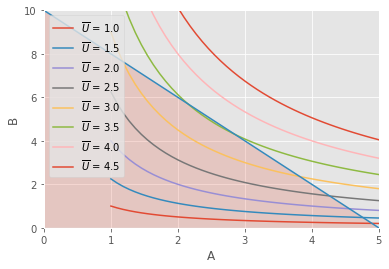

In [177]:
# Visualizando ambos os graficos
fig, ax = plt.subplots()
plot_indifference_curves(ax)
plot_ro(ax)

### Escolha Ótima

A escolha ótima do consumidor é maximizar sua utilidade dado sua restrição orçamentária.

Matematicamente,

$\max_{A, B}A^\alpha B^{1 - \alpha} \\ \text{ s.a. } p_A A + p_B B = M$

O Lagrangeano do problema será 

$\mathcal{L} = A^\alpha B^{1 - \alpha} - \lambda(p_A A + p_B B - M)$

Já temos a nossa função objetivo, `U`, e nossa função de restrição, `restricao`.
Contudo, temos que deixá-las na forma que o `scipy` consegue otimizar.

In [178]:
# Definindo a função utilidade (- porque o scipy só resolve minimzação)
def utilidade(x, alpha):
    return -(x[0] ** (alpha) * x[1] ** (1 - alpha))

# Definindo a restrição orçamentária
def restricao_orcamentaria(x, precos):
    return precos[0] * x[0] + precos[1] * x[1]

In [179]:
# Parâmetros
alpha = .5
renda = 10
precos = np.array([2, 1])

# Chute inicial (qualificado pelo gráfico acima)
x0 = np.array([2, 4])

# Limite e dicionário com o tipo de restrição
limites = ((0, None), (0, None))
tipo_restricao = opt.NonlinearConstraint(lambda x: restricao_orcamentaria(x, precos), lb=renda, ub=renda)

In [180]:
# Resolvendo o problema
result = opt.minimize(utilidade, 
                      args=(alpha),
                      x0=x0, 
                      bounds=limites, 
                      constraints=tipo_restricao,
                      method='trust-constr')

/Users/vinicius/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


In [181]:
# Vendo as quantidades ótimas
for i in [1, 2]:
    print(f"Quantidade ótima do bem {i}: {round(result.x[i - 1], 2)}")

# Vendo multiplicador de lagrange
print(f"Multiplicador de Lagrange (UMgRenda ou Preço-Sombra): {np.around(result.v[0], 3)}.")
print(f"Valor Teórico (com alpha = 0,5): {round(1 / (2 * (precos[0] * precos[1])**.5), 3)}.")

Quantidade ótima do bem 1: 2.5
Quantidade ótima do bem 2: 5.0
Multiplicador de Lagrange (UMgRenda ou Preço-Sombra): [0.354].
Valor Teórico (com alpha = 0,5): 0.354.


## Minimização de Dispêndio

O problema do consumidor também pode ser expresso em sua forma dual.

Ao invés de maximizar sua utilidade sujeito a uma restrição orçamentária, ele minimiza o dispêndio ($e$) necessário para atingir uma certa utilidade $\overline{U}$.

O problema então passa a ser

$\min_{A, B} p_aA + p_bB \\ \text{ s.a. } A^\alpha B^{1 - \alpha} = \overline{U}$.

In [182]:
# Definindo a função dispêndio (= restrição orçamentária)
def dispendio(x, precos):
    return precos[0] * x[0] + precos[1] * x[1]

In [183]:
# Defindo Ubarra como a utilidade indireta do problema primal
U_bar = -result.fun

# Definindo restrição de utilidade mínima
tipo_restricao_dual = opt.NonlinearConstraint(lambda x: -utilidade(x, alpha), lb=U_bar, ub=U_bar)

In [184]:
# Resolvendo o problema
result_dual = opt.minimize(dispendio, 
                           args=precos,
                           x0=x0,
                           bounds=limites, 
                           constraints=tipo_restricao_dual,
                           method='trust-constr')

In [185]:
# Vendo as quantidades ótimas
for i in [1, 2]:
    print(f"Quantidade ótima do bem {i}: {round(result_dual.x[i - 1], 2)}")

Quantidade ótima do bem 1: 2.5
Quantidade ótima do bem 2: 5.0
